In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Model

from sklearn.model_selection import train_test_split

In [50]:
data = pd.read_csv("mnist_train_small.csv").values
X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

In [51]:
ohe = OneHotEncoder(categories="auto")

In [52]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [54]:
X[0].shape

(28, 28, 1)

In [55]:
in_layer = Input(shape=[28, 28, 1])
conv_1 = Conv2D(32, (3, 3), activation="relu")(in_layer)
pool_1 = MaxPool2D()(conv_1)
conv_2 = Conv2D(64, (3, 3), activation="relu")(pool_1)
pool_2 = MaxPool2D()(conv_2)
conv_3 = Conv2D(128, (3, 3), activation="relu")(pool_2)
pool_3 = MaxPool2D()(conv_3)
flatten = Flatten()(pool_3)
dense_1 = Dense(200, activation="tanh")(flatten)
dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(50, activation="tanh")(drop)
out = Dense(10, activation="softmax")(dense_3)

In [56]:
model = Model(inputs=[in_layer], outputs=[out])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [58]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [59]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 5s 905us/step - loss: 1.6662 - acc: 0.4806
Epoch 2/10
5360/5360 [==============================] - 4s 756us/step - loss: 0.7473 - acc: 0.8162
Epoch 3/10
5360/5360 [==============================] - 4s 750us/step - loss: 0.4086 - acc: 0.8989
Epoch 4/10
5360/5360 [==============================] - 4s 752us/step - loss: 0.2924 - acc: 0.9269
Epoch 5/10
5360/5360 [==============================] - 4s 759us/step - loss: 0.2223 - acc: 0.9440
Epoch 6/10
5360/5360 [==============================] - 4s 755us/step - loss: 0.1956 - acc: 0.9504
Epoch 7/10
5360/5360 [==============================] - 4s 760us/step - loss: 0.1634 - acc: 0.9560
Epoch 8/10
5360/5360 [==============================] - 4s 750us/step - loss: 0.1401 - acc: 0.9653
Epoch 9/10
5360/5360 [==============================] - 4s 746us/step - loss: 0.1250 - acc: 0.9655
Epoch 10/10
5360/5360 [==============================] - 4s 758us/step - loss: 0.1263 - acc: 0.9668


In [60]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 344us/step


[0.1818165606395765, 0.9462121212121212]

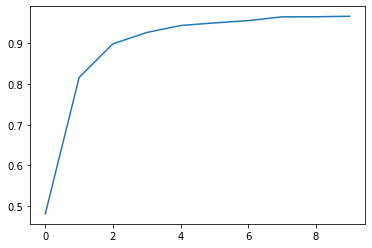

In [61]:
plt.plot(hist.history["acc"])

In [62]:
m2 = Model(inputs=[in_layer], outputs=[conv_1])

In [63]:
images = m2.predict(X_test[:30])

In [64]:
images.shape

(30, 26, 26, 32)

c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


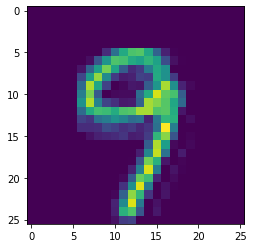

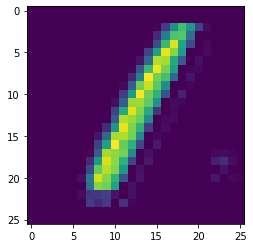

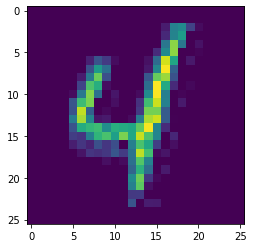

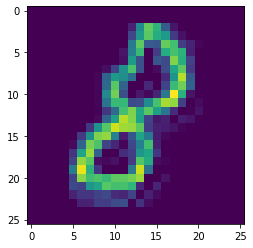

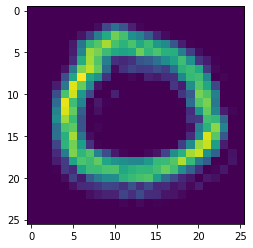

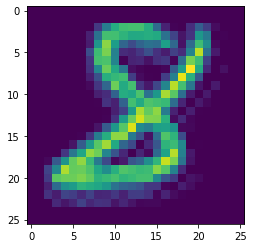

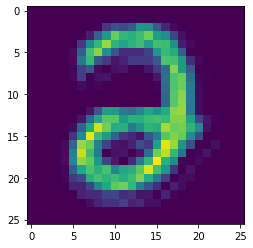

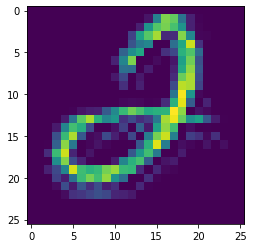

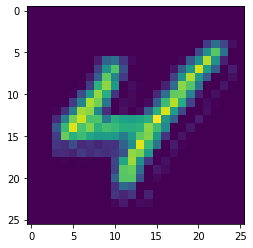

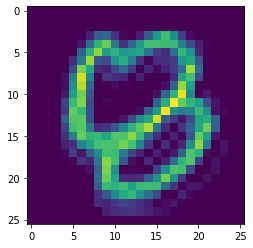

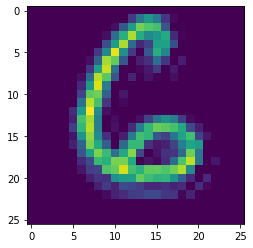

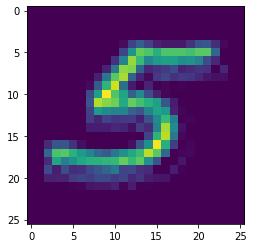

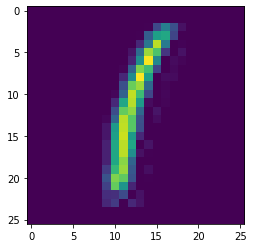

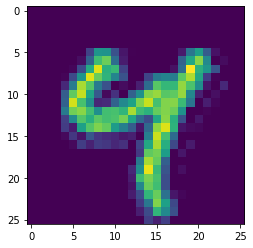

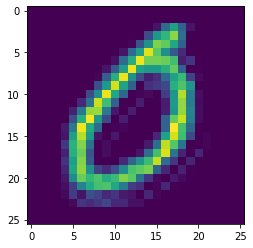

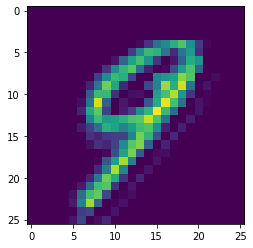

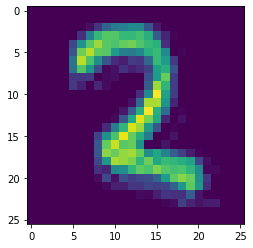

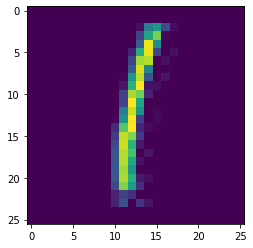

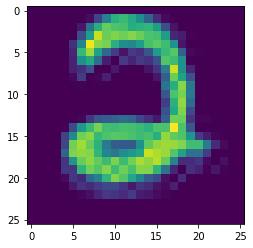

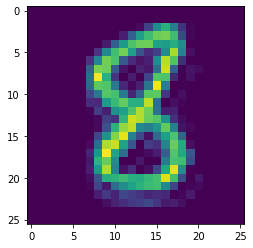

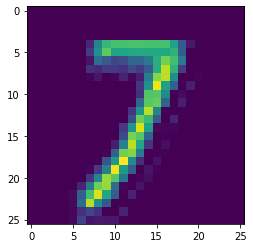

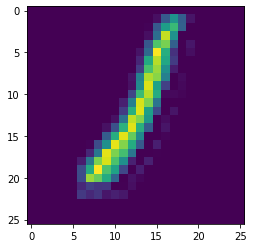

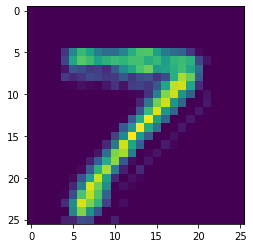

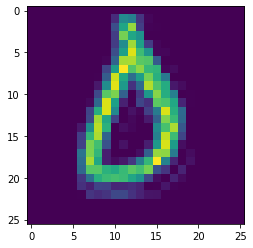

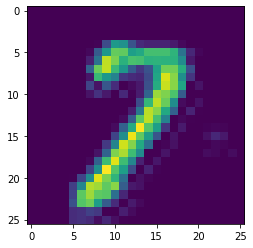

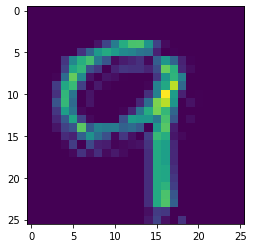

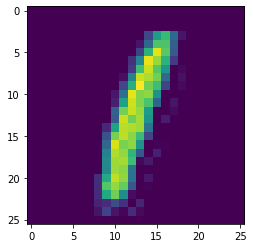

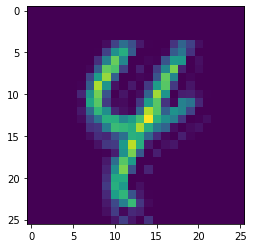

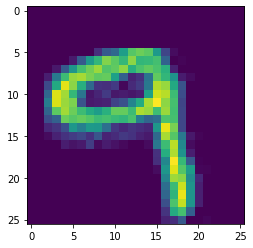

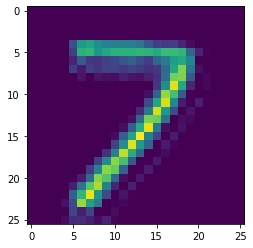

In [65]:
for i in range(30):
    plt.figure()
    plt.imshow(images[i,:,:,0])

In [71]:
m3 =Model(inputs =[in_layer],outputs=[conv_2])

In [72]:
m3.predict(X_test[:30]).shape

(30, 11, 11, 64)

c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


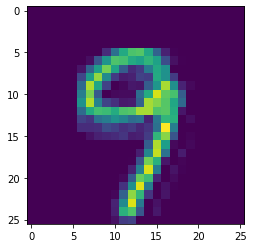

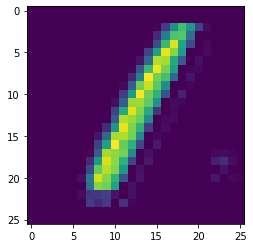

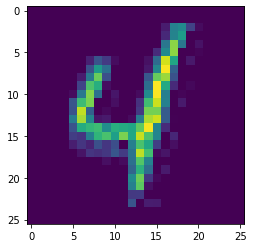

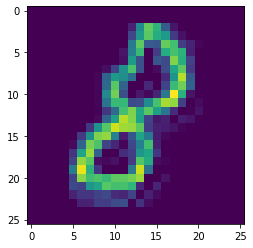

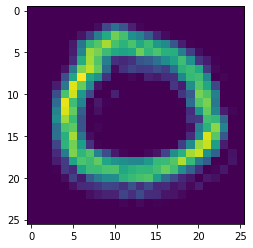

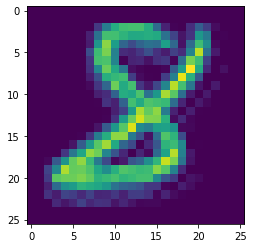

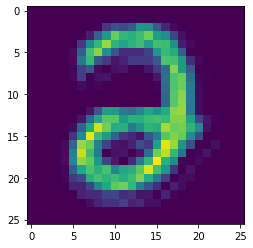

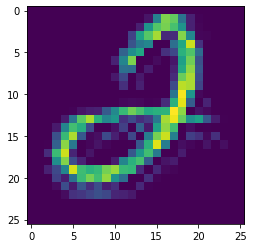

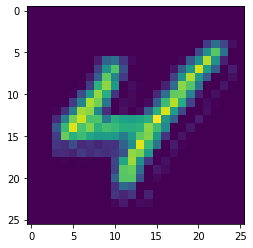

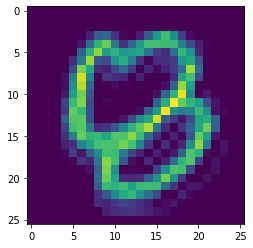

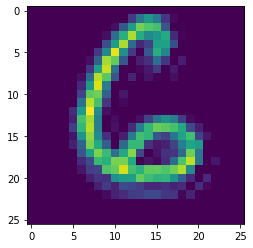

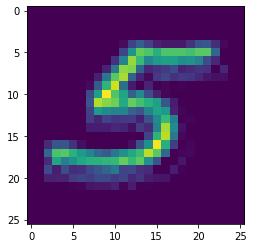

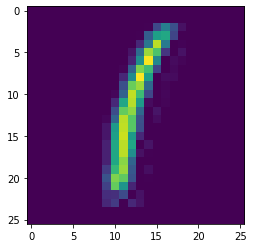

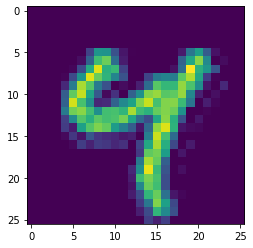

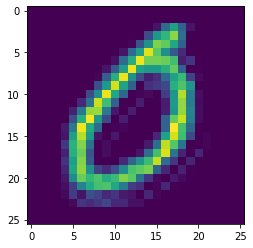

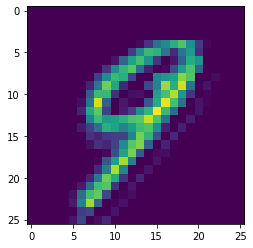

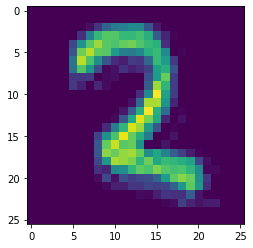

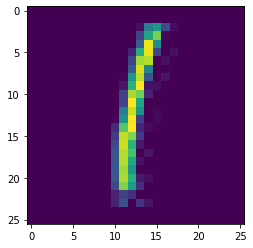

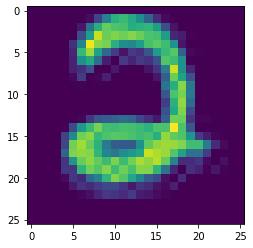

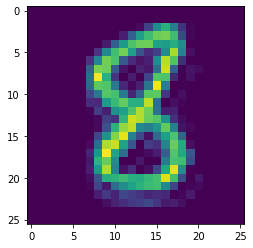

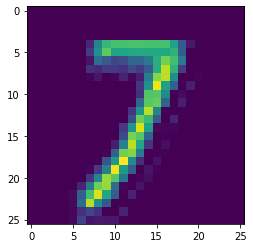

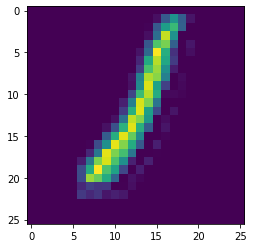

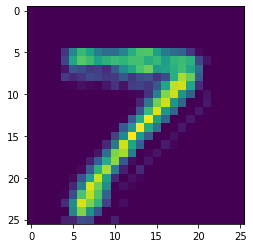

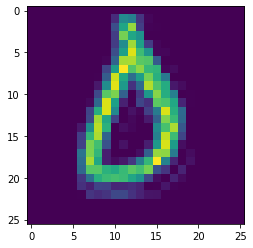

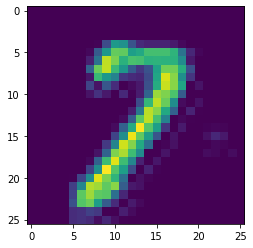

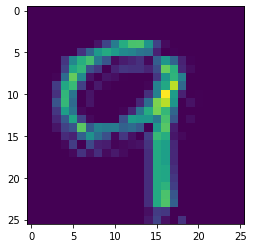

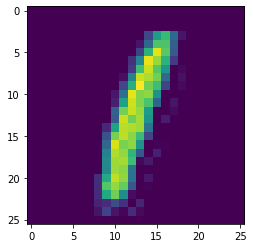

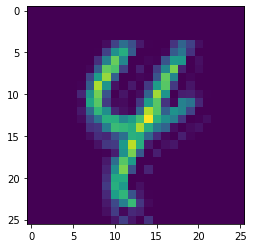

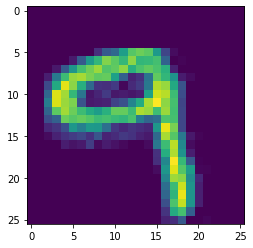

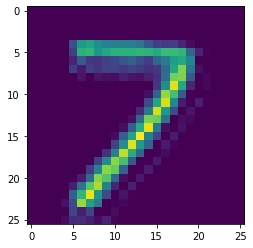

In [73]:
for i in range(30):
    plt.figure()
    plt.imshow(images[i,:,:,0])
    